In [37]:
from google.colab import drive

# This will authorize Colab to access Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import pickle
from scipy.stats import pearsonr
rng = np.random.default_rng()

# **Degree correlations and assortativity**

In this problem, we consider degree correlations and assortativity of two real-world networks: the Zachary karate club network `karate_club_edge_list.edg` (W. W. Zachary, 1977, “An information flow model for conflict and fission in small groups”) and a snowball-sampled subgraph of a Facebook friendships network `facebook-wosn-links_subgraph.edg` (http://konect.uni-koblenz.de/networks/facebook-wosn-links, B. Viswanath, A. Mislove, M. Cha, and K. P. Gummadi, 2009, “On the evolution of user interaction in Facebook”).

You can use this notebook to get you started. You only need to fill in the required functions. Some of the functions do NOT need modifications.The usage of the notebook is **optional**.

Return your solutions by taking a quiz in MyCourses. Return also your commented Python code or notebook. Remember to label the axes in your figures!

In [40]:
#KARATE_CLUB_NETWORK
file_path_karate = "/content/drive/MyDrive/Complex Networks /karate_club_edge_list.edg"
file_path_karate_coords = "/content/drive/MyDrive/Complex Networks /karate_club_coords.pkl"
karate_club_net = nx.read_weighted_edgelist(file_path_karate, nodetype=int)
with open(file_path_karate_coords, 'rb') as file:
    # Load the data from the Pickle file
    karate_club_coords = pickle.load(file, encoding='latin1')

In [41]:
#FACEBOOK_NETWORK
file_path_fb = "/content/drive/MyDrive/Complex Networks /facebook-wosn-links_subgraph.edg"
fbwosn_net = nx.read_weighted_edgelist(file_path_fb, nodetype=int)


In [42]:
networks = [karate_club_net, fbwosn_net]
network_names = ['karate', 'facebook-wosn']
network_titles = ['karate club network', 'Facebook friendship network']

In [43]:
# NO NEED TO MODIFY THESE FUNCTIONS
def create_scatter(x_degrees, y_degrees, network_title):
    """
    For x_degrees, y_degrees pair, creates and
    saves a scatter of the degrees.

    Parameters
    ----------
    x_degrees: list or array
    y_degrees: list or array
    network_title: str
        a network-referring title (string) for figures

    Returns
    -------
    fig: figure object
    """
    fig, ax = plt.subplots(figsize=(4, 4), layout='constrained')
    alpha = 0.5
    ax.plot(x_degrees, y_degrees, 'r', ls='', marker='o', ms=3, alpha=alpha)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')
    ax.set_title(network_title)

    return fig

def create_heatmap(x_degrees, y_degrees, network_title):
    """
    For x_degrees, y_degrees pair, creates and
    saves a heatmap of the degrees.

    Parameters
    ----------
    x_degrees: list or array
    y_degrees: list or array
    network_title: str
        a network-referring title (string) for figures

    Returns
    -------
    fig: figure object
    """
    k_min = np.min((x_degrees, y_degrees))
    k_max = np.max((x_degrees, y_degrees))

    n_bins = k_max - k_min + 1
    statistic = stats.binned_statistic_2d(x_degrees, y_degrees, None,
                                          statistic='count', bins=n_bins)[0]

    fig, ax = plt.subplots(figsize=(6, 6), layout='constrained')
    cmap = plt.get_cmap('hot')
    ax.imshow(statistic, extent=(k_min-0.5, k_max+0.5, k_min-0.5, k_max+0.5),
              origin='lower', cmap=cmap, interpolation='nearest')
    ax.set_title(network_title)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')
    norm = mpl.colors.Normalize(vmin=np.min(statistic), vmax=np.max(statistic))
    scm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(scm, ax=ax)
    return fig

## **a) Create Scatter Plots**
**Create scatter plots** of the degrees of pairs of connected nodes. That is, take each connected pair of nodes $(i,j)$, take their degrees $k_i$ and $k_j$, plot the point $(k_i,k_j)$ on two axes with degrees as their units, and repeat for all pairs of connected nodes. Do this for both Karate club and Facebook network. Because the network are undirected, the plots should be symmetrical, containing points $(k_i,k_j)$ and $(k_j,k_i)$ for all connected pairs $(i,j)$.


In [53]:
def get_x_and_y_degrees(network):
  edges = network.edges()

  x_degrees = []
  y_degrees = []

  for edge in edges:
    x_degrees.append(network.degree(edge[0]))
    y_degrees.append(network.degree(edge[1]))

    x_degrees.append(network.degree(edge[1]))
    y_degrees.append(network.degree(edge[0]))

  return x_degrees, y_degrees


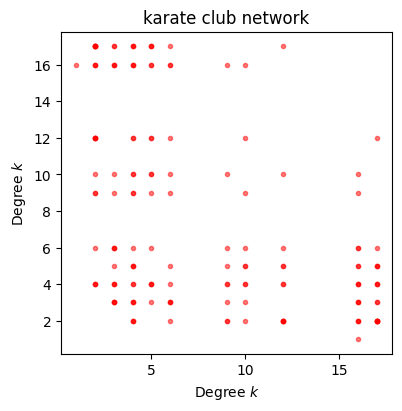

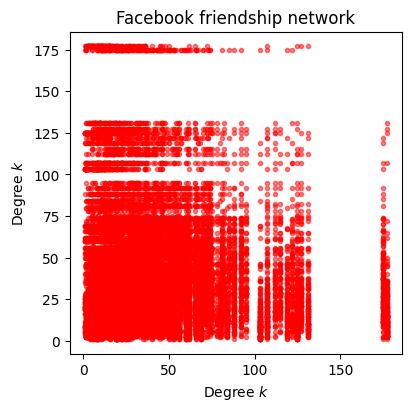

In [54]:
#loop through the networks, produce the scatter plot for each network
# and save the plot in the corresponding path
networks = [karate_club_net, fbwosn_net]
network_names = ['karate', 'facebook-wosn']
network_titles = ['karate club network', 'Facebook friendship network']

for network, network_name, network_title in zip(networks, network_names, network_titles):
    x_degrees, y_degrees = get_x_and_y_degrees(network)
    fig = create_scatter(x_degrees, y_degrees, network_title)

## **b) Heatmap**
For the Facebook friendship network, **produce a heat map** of the degrees of connected node pairs (http://en.wikipedia.org/wiki/Heat_map). The heat map uses the same information as you used in part a), that is, the degrees of pairs of connected nodes. However, no points are plotted: rather, the two degree axes are **binned** and the number of degree pairs $(k_i,k_j)$ in each bin is computed. Then, the bin is colored according to this number (e.g., red = many connected pairs of nodes with degrees falling in the bin). Again, the heat map ought to be symmetrical.

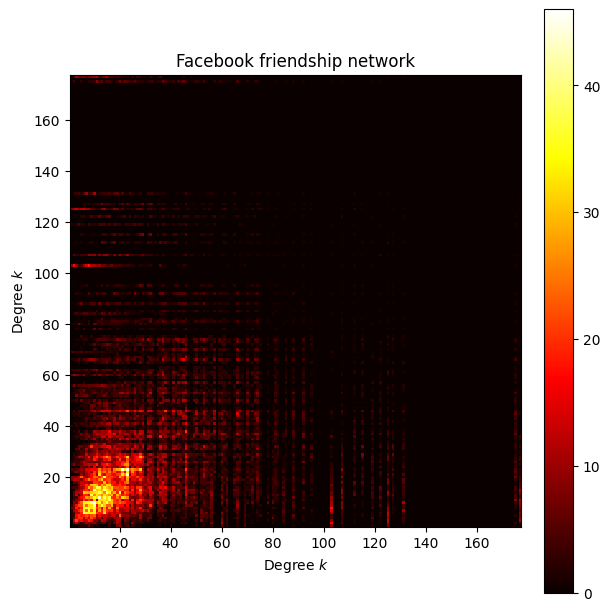

In [55]:
x_degrees, y_degrees = get_x_and_y_degrees(fbwosn_net)
fig = create_heatmap(x_degrees, y_degrees, network_titles[1])

 **What extra information** do you gain by using a heatmap instead of just a scatter plot (if any)?


In the scatter plot of Facebook friendship network, each user is considered as a dot. But with so many overlapping dots, pattterns can be seen well.
A heatmap of the same data color encodes the density of connections between different regions of the network, in fact clustered groups of close friends show up as intense hot spots of color, so the heatmap provides a compact overview of the network structure and clustering that is hard to discern from the scattered dots.
The color gradients also make it easier to see the density variation across the network and spot particularly dense clusters.
Overall, the heatmap highlights macro-level patterns like communities, while the scatter plot is better for seeing specific individual connections.

## **c) Assortativity**
The assortativity coefficient is defined as the Pearson correlation coefficient of the degrees of pairs of connected nodes.
**Calculate and report the assortativity coefficients for the two networks** both using `scipy.stats.pearsonr` and NetworkX function `degree_assortativity_coefficient`. Check that both methods return the same value.
As mentioned in the lecture, social networks are typically assortative. **Does this hold** for the Zachary carate club network? **Explain** how does the specific structure of network impacts assortativity in this case.

In [56]:
def assortativity(x_degrees, y_degrees):
    """
    Calculates assortativity for a network, i.e., Pearson correlation
    coefficient between x_degrees and y_degrees in the network.

    Parameters
    ----------
    x_degrees: np.array
        Array of degrees for the first set of nodes (e.g., x_degrees).
    y_degrees: np.array
        Array of degrees for the second set of nodes (e.g., y_degrees).

    Returns
    -------
    assortativity: float
        The assortativity value of the network as a number.
    """
    # Calculate assortativity using scipy's pearsonr
    pearson_corr, _ = pearsonr(x_degrees, y_degrees)

    return pearson_corr


In [57]:
for network, network_name, network_title in zip(networks, network_names, network_titles):
    x_degrees, y_degrees = get_x_and_y_degrees(network)
    # assortativities
    assortativity_own = assortativity(x_degrees, y_degrees)
    assortativity_nx = nx.degree_assortativity_coefficient(network)
    print("Own assortativity for {} : {:.5g}".format(network_title, assortativity_own))
    print("NetworkX assortativity for {} : {:.5g}\n".format(network_title, assortativity_nx))

Own assortativity for karate club network : -0.47561
NetworkX assortativity for karate club network : -0.47561

Own assortativity for Facebook friendship network : 0.055985
NetworkX assortativity for Facebook friendship network : 0.055985



<ipython-input-19-c8f4974f6a43>:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm, label="Node Degree")


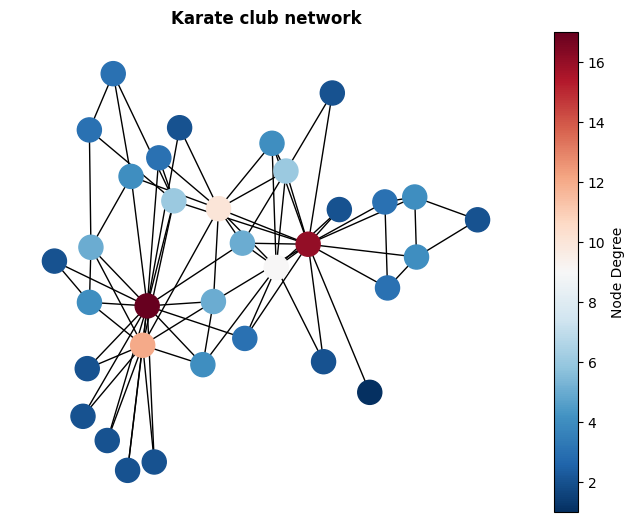

In [ ]:
degrees = dict(karate_club_net.degree())
norm = plt.Normalize(min(degrees.values()), max(degrees.values()))
node_colors = [plt.cm.RdBu_r(norm(i)) for i in degrees.values()]

pos = nx.spring_layout(karate_club_net)
nx.draw(karate_club_net, pos, node_color=node_colors, with_labels=False)

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdBu_r, norm=norm)
sm.set_array([])
colorbar = plt.colorbar(sm, label="Node Degree")

plt.title("Karate club network", fontweight="bold")
plt.show()

The disassortativity of the network is due to the fact that nodes with a high degree are more likely to be connected to nodes with a low degree. This is in contrast to assortative networks, where nodes with a high degree are more likely to be connected to other nodes with a high degree.
The disassortative nature of this network is due to its community structure, which is characterized by two densely connected subgroups that are only sparsely connected to each other. This structure is often referred to as a "bipartite", where nodes within each group are more likely to be connected to nodes in the other group than to nodes within their own group.
Because the two subgroups are only sparsely connected to each other, the high-degree nodes are more likely to be connected to low-degree nodes than they are to other high-degree nodes. This is because the low-degree nodes are the only way to connect to the other subgroup.

## **d) Average Nearest Neighbor Degree**

For the Facebook network, **compute** the average nearest neighbour degree $k_{nn}$ of each node and **make a scatter plot** of $k_{nn}$ as a function of $k$. In the same plot, **draw** also the curve of $\langle k_{nn} \rangle(k)$ as a function of $k$, i.e. the average of $k_{nn}$ for each $k$ value. In a perfectly assortative network, $\langle k_{nn} \rangle(k)$ increases monotonically as a function of $k$. **Is this the case here?** Looking at the curve, can you identify different regimes in terms of assortativity? **Describe** them shortly.

In [ ]:
def get_nearest_neighbor_degree(network):
    """
    Calculates the average nearest neighbor degree for each node.

    Parameters
    ----------
    network: NetworkX graph

    Returns
    -------
    degrees: list-like
        array of degree of nodes
    nearest_neighbor_degrees: list-like
        an array of average nearest neighbor degree of nodes
        in the same order as degrees
    """
    degrees = []  # List to store degrees of nodes
    avg_nearest_neighbor_degrees = []  # List to store avg nearest neighbor degrees

    # Calculate degrees of nodes
    degree_dict = dict(nx.degree(network))

    # Calculate average nearest neighbor degrees
    avg_neighbor_degree_dict = nx.average_neighbor_degree(network)

    # Ensure that the order of nodes is consistent
    nodes = network.nodes()

    for node in nodes:
        degrees.append(degree_dict[node])
        avg_nearest_neighbor_degrees.append(avg_neighbor_degree_dict[node])

    return degrees, avg_nearest_neighbor_degrees


In [ ]:
def calculate_average_y_for_each_unique_x_value(x_values, y_values):
    """
    Calculates average of y values for each unique x value.

    Parameters
    ----------
    x_values: an array of x values
    y_values: an array of corresponding y values

    Returns
    -------
    unique_x_values: an array of unique x values
    bin_average: an array of average y values per each unique x
    """
    # Create an array of unique x-values
    unique_x_values = np.unique(x_values)

    # Initialize a dictionary to group y-values by unique x-values
    grouped_y_values = {x: [] for x in unique_x_values} #KEY is the degree and VALUE is []

    # Iterate through the data and group y-values by x-values
    for i, x in enumerate(x_values):
        y = y_values[i]
        grouped_y_values[x].append(y) #KEY is the degree and VALUE is a list with the avg of nn degree linked to a node with key value degree (1 degrre, many nn avg)

    # Calculate the average of y-values for each unique x-value
    y_averages = np.array([np.mean(grouped_y_values[unique_x]) for unique_x in unique_x_values])

    return unique_x_values, y_averages


In [ ]:
#you do not need to change anything in this function
def visualize_nearest_neighbor_degree(degrees, nearest_neighbor_degrees,
                                      unique_x_value, y_averages,
                                      network_title):
    """
    Visualizes the nearest neighbor degree for each degree as a scatter and
    the mean nearest neighbor degree per degree as a line.

    Parameters
    ----------
    degrees: list-like
        an array of node degrees
    nearest_neighbor_degrees: list-like
        an array of average nearest neighbor degree of nodes
        in the same order as degrees
    unique_x_value: list-like
        unique degree values
    y_averages: list-like
        the mean nearest neighbor degree per unique degree value
    network_title: str
        network-referring title (string) for figure

    Returns
    -------
    fig : figure object
    """

    fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
    ax.scatter(degrees, nearest_neighbor_degrees, marker='.', label=r'$k_{nn}(k)$')
    ax.plot(unique_x_value, y_averages, color='r', lw=2, label=r'$\langle k_{nn} \rangle (k)$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(network_title)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Average nearest neighbor degree $k_{nn}$')
    ax.legend(loc=0)
    return fig

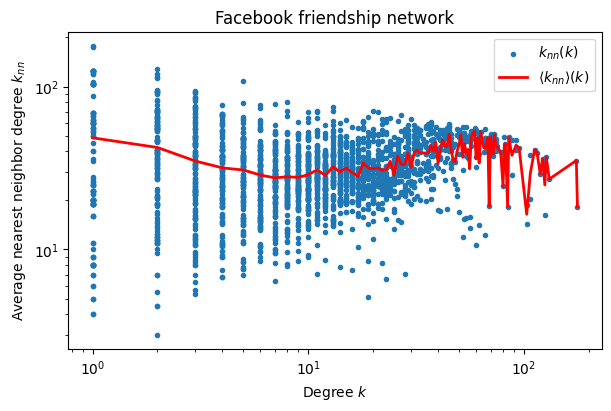

In [ ]:
network = fbwosn_net
network_name = 'facebook-wosn'
network_title = 'Facebook friendship network'

degrees, nearest_neighbor_degrees = get_nearest_neighbor_degree(network)

unique_degrees, mean_nearest_neighbor_degrees = calculate_average_y_for_each_unique_x_value(degrees, nearest_neighbor_degrees)

fig = visualize_nearest_neighbor_degree(degrees,
                                        nearest_neighbor_degrees,
                                        unique_degrees,
                                        mean_nearest_neighbor_degrees,
                                        network_title)

In the case of the Facebook network, it is not possible to define a perfectly assortative behavior, but rather different regimes can be observed: for nodes with a degree up to 100, the network's behavior can be described as disassortative, as nodes with relatively low degrees tend to connect with nodes with higher degrees. As the degree increases, a vaguely assortative behavior emerges, as these nodes tend to connect with nodes whose degree is relatively similarly high. Finally, for nodes with very high degrees, there is no well-defined behavior, as they are few in number, and it is not always possible to calculate an average as in the previous cases.

## **Community detection**
In this exercise, we are going to learn how a simple community detection method works and how different algorithms perform on real-world networks. The network data that we are going to use are:
- Zachary's karate club network (`karate_club_edge_list.edg`): A classic social network of a karate club, originally collected by Zachary in 1970s.
- Dolphin social network (`dolphins_edge_list.edg`): A social network of bottlenose dolphins collected by Lusseau et al. (2003).
- Political blog network (`polblogs_edges.csv`): A network of hyperlinks between weblogs on US politics, recorded in 2005 by Adamic and Glance.

In [62]:
!pip install infomap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=7690299 sha256=79e63a7575eda636b486207efc1c5aa1e8b7ecc05766477cadf376691d0c0f91
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


In [63]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import infomap
import collections
import pickle
import os
import pandas as pd

rng = np.random.default_rng()

In [64]:
#KARATE_CLUB_NETWORK
file_path_karate = "/content/drive/MyDrive/Complex Networks /karate_club_edge_list.edg"
file_path_karate_coords = "/content/drive/MyDrive/Complex Networks /karate_club_coords.pkl"
karate_club_net = nx.read_weighted_edgelist(file_path_karate, nodetype=int)
with open(file_path_karate_coords, 'rb') as file:
    # Load the data from the Pickle file
    karate_club_coords = pickle.load(file, encoding='latin1')

In [65]:
#DOLPHINS NETWORK
file_path_dolphins = "/content/drive/MyDrive/Complex Networks /dolphins_edge_list.edg"
file_path_dolphins_coords = "/content/drive/MyDrive/Complex Networks /dolphins_coords.pkl"
dolphins_net = nx.read_weighted_edgelist(file_path_dolphins, nodetype=int)
with open(file_path_dolphins_coords, 'rb') as file:
    # Load the data from the Pickle file
    dolphins_coords = pickle.load(file, encoding='latin1')

In [66]:
file_path_polblogs = "/content/drive/MyDrive/Complex Networks /polblogs_edges.csv"
polblogs_fname = os.path.join(file_path_polblogs)
polblogs_net = nx.read_edgelist(polblogs_fname, delimiter=',', nodetype=int)

In [67]:
def visualize(network, membership, coords, ax=None, figsize=(6, 4)):
    """
    Creates visualization of a network with node colored by community.

    Parameters
    ----------
    network: networkx.Graph()
    membership: dict
        Dictionary where keys are nodes and values are community indices
    coords: node coordinates
    fig_size: tuple
        Size of the figure

    Returns
    -------
    fig, ax: matplotlib figure and axes
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    # Adaptive node size based on the figure size and number of nodes
    node_size = 150 * figsize[0] * figsize[1] / len(network.nodes())
    Wong_color_palette = ['#000000', '#E69F00', '#56B4E9', '#009E73',
                          '#F0E442', '#0072B2', '#D55E00', '#CC79A7']
    node_color = [Wong_color_palette[membership[node]] for node in network.nodes()]

    nx.draw(network, pos=coords, ax=ax,
            node_color=node_color, node_size=node_size, edgecolors='black', linewidths=0.8,
            edge_color='grey', width=0.8)
    return fig, ax

## **a) Implementing the label propagation algorithm**

Your first task is to **implement** the label propagation algorithm. Label propagation is a simple yet efficient algorithm based on the idea that each node is likely to be linked to other nodes belonging to the same community. There are ready-made functions for this in NetworkX, but here we want to implement it ourselves. The algorithm works as follows:
1. Initially, each node is assigned to its own community with a unique label.
2. In each iteration, each node adopts the label that is most frequent among its neighbors. In particular:
    2.1. All nodes are visited in a random order.
    2.2. When a node is visited, it updates its community label to the most frequent label among its neighbors. If there are several such labels, one of them is chosen randomly.
3. If every node is assigned a community label that is most frequent among its neighbors, no more update is possible and the algorithm stops. Otherwise, it repeats step 2.

Let us use the implemented algorithm to **find communities** in the karate club network. Since the label propagation algorithm is non-deterministic, the communities found may vary between runs. One way to deal with this issue is to run the algorithm multiple times and adopt the most frequent community structure as the result. We know that a conflict between the karate club members during the study caused the club to split into two. So, the karate club network has two communities. Therefore, let us **sample 1000 runs** that find two communities (bipartitions) and take the most frequent bipartition as our guess for the community structure of the network. **Visualize** the network with nodes colored according to the communities found.

**Hints**:
- A random order can be obtained by using `rng.permutation()` or `rng.shuffle()`.
- In case of a tie, `rng.choice()` can be used to choose one at random.
- You can also use `collections.Counter()` to count the frequency of community labels among the neighbors of a node.

In [58]:
def label_propagation(G, rng):
    """
    Label propagation algorithm for community detection.
    The nodes are updated in a random order. If there are more than one
    community label with the highest frequency among neighbors of a node,
    choose one at random to break the tie.

    Parameters
    ----------
    G : networkx.Graph
        The input graph.

    rng : random.Random
        A random number generator.

    Returns
    -------
    partition : list of sets
        Partition of the nodes of G. Each set contains the nodes that belong to
        the same community.
    """
    # Get a list of nodes in random order
    nodes = list(G.nodes())
    rng.shuffle(nodes)

    # Initialize each node with a unique community label
    membership = {node: i for i, node in enumerate(nodes)}

    while True:
        # Create a flag to track if any node's label has changed in this iteration
        labels_changed = False

        # Iterate through nodes in random order
        for node in nodes:
            # Count the frequency of each community label among neighbors
            neighbor_labels = [membership[neighbor] for neighbor in G.neighbors(node)]
            label_counts = collections.Counter(neighbor_labels)

            # Find the most frequent label(s)
            max_count = max(label_counts.values())
            most_frequent_labels = [label for label, count in label_counts.items() if count == max_count]

            # If there is a tie, choose one label at random
            new_label = rng.choice(most_frequent_labels) #if there is only one element in most_frequent_labels, this choice will select it

            # Update the label if it has changed
            if membership[node] != new_label:
                membership[node] = new_label
                labels_changed = True

        # If no labels changed in this iteration, the algorithm has converged
        if not labels_changed:
            break

    # Convert the dictionary of node::community index to a list of sets of nodes
    partition = []
    for comm_idx in set(membership.values()):
        partition.append({node for node in membership if membership[node] == comm_idx})

    return partition

In [59]:
def partition_to_membership(partition):
    """
    Convert a partition of nodes (list of sets) to a dictionary of node: community index
    """
    membership = {node: i for i, comm in enumerate(partition) for node in comm}
    return membership

Text(0.5, 1.0, 'Label propagation on Karate club communities ')

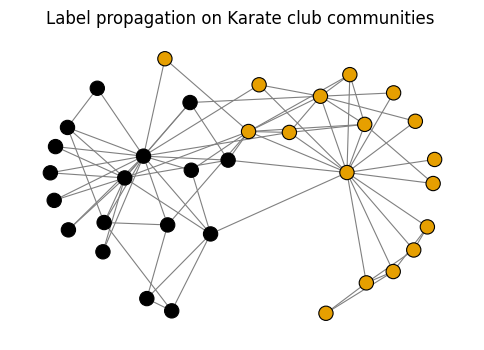

In [ ]:
# Dictionary of realized bipartions and their frequency
realized_bipartitions = {}
n_bipartitions = 0
# Run until you sample 1000 bipartitions
sample_size = 1000
while True:
    # Run label propagation algorithm
    partition = label_propagation(karate_club_net, rng)

    if len(partition) == 2:
        frozen_partition = frozenset([frozenset(comm) for comm in partition])
        # If the detected bipartition is new, add it to the dictionary and set the frequency to 1
        # If the bipartition is already in the dictionary, increase the frequency by 1
        realized_bipartitions[frozen_partition] = realized_bipartitions.get(frozen_partition, 0) + 1
        n_bipartitions += 1
    if n_bipartitions == sample_size:
        break

# Sort the realized bipartitions by frequency
most_common_bipartition = sorted(realized_bipartitions.keys(),
                                 key=lambda x: realized_bipartitions[x], reverse=True)[0]
# Convert the partition to membership
most_common_membership = partition_to_membership(most_common_bipartition)
# Visualize the network with the most common bipartition
fig_karate, ax_karate = visualize(karate_club_net, most_common_membership, karate_club_coords)
plt.title("Label propagation on Karate club communities ")

## **b) Comparing different community detection methods**
Next, let us compare the performance of different community detection methods. There are many different algorithms out there, but we will be focusing on the following three:
- **Infomap**: A random walk based algorithm which tries to find a partition that minimizes the description length of the trajectory of the walker.
- **(Semi-synchronous) label propagation**: Similar to the one you implemented above, but uses a synchronous updating scheme.
- **Louvain algorithm for modularity maximization**: A greedy algorithm that tries to find a partition that maximizes the modularity of the network.

Your task is to **apply** these three methods to find communities in the dolphin network and the political blog network. Here again, Infomap and Louvain are non-deterministic algorithms that may generate different partitions every time they are run. To mitigate the effect of randomness, **run each algorithm** 100 times for the dolphin network and 20 times for the political blog network, and choose the partition with the shortest code length (Infomap) or highest modularity (Louvain) as the result.

**Report** the number of communities and modularity of the partition found by each algorithm. In addition, **visualize** the partitions for the dolphins network.

**Hint**: This time, you may use ready-made functions in NetworkX. Read the NetworkX documentation for community detection algorithms (https://networkx.org/documentation/stable/reference/algorithms/community.html). We will use the implementation of Infomap in the `infomap` package, as the implementation is not included in NetworkX.

In [ ]:
def infomapWrapper(G, rng, num_trials=1):
    """
    Wrapper function for Infomap algorithm.
    Runs Infomap on network G for `num_trials` times and return the best partition.

    Parameters
    ----------
    G : networkx.Graph
        The network to be partitioned.
    rng : numpy.random.Generator
    num_trials : int
        The number of times to run Infomap.

    Returns
    -------
    partition: list of sets of nodes
        The partition with the shortest codelength in `num_trials` runs of Infomap.
    """
    im = infomap.Infomap(silent=True, num_trials=num_trials, seed=rng.integers(10**8))
    mapping = im.add_networkx_graph(G)
    im.run()
    print('Infomap found {} modules with codelength: {:.4g}'.format(im.num_top_modules, im.codelength))
    partition_dict = {}
    for node_id, module_id in im.modules:
        partition_dict.setdefault(module_id, set()).add(mapping[node_id])
    partition = list(partition_dict.values())
    return partition

In [ ]:
def compare_community_detection_methods(G, rng, num_trials=1):
    '''
    Compare community structures obtained by three different methods:
        - Infomap
        - label propagation
        - Louvain algorithm for modularity maximization

    Parameters
    ----------
    G : networkx.Graph
        Input graph.

    Returns
    -------
    Each of the partitions is represented as a list of sets of nodes, where
    each set corresponds to a community.
    partition_infomap: list of sets
        Partition of G obtained by Infomap.
    partition_labelprop: list of sets
        Partition of G obtained by semi-synchronous label propagation.
    partition_louvain: list of sets
        Partition of G obtained by the Louvain algorithm for modularity maximization.
    '''
    # Partition of G obtained by Infomap
    print("INFOMAP ALGORITHM")
    partition_infomap = infomapWrapper(G, rng, num_trials=num_trials)
    print('Number of communities found: {}'.format(len(partition_infomap)))
    print('Modularity of the partition: {:.4f}'.format(nx.community.modularity(G, partition_infomap)))
    print("-----------------------------------------------------\n")

    # Partition of G obtained by semi-synchronous label propagation
    partition_labelprop = list(nx.community.label_propagation_communities(G))
    label_prop_modularity = nx.community.modularity(G, partition_labelprop)

    print("SEMI-SYNCHRONOUS LABEL PROPAGATION")
    print('Number of communities found: {}'.format(len(partition_labelprop)))
    print('Modularity of the partition: {:.4f}'.format(label_prop_modularity))
    print("-----------------------------------------------------\n")

    # Partition of G obtained by the Louvain algorithm for modularity maximization
    best_modularity= -float("inf")
    for i in range(num_trials):
      partition_louvain = nx.community.louvain_communities(G)
      modularity = nx.community.modularity(G, partition_louvain)
      if modularity > best_modularity:
        best_partition_louvain= partition_louvain
        best_modularity = modularity

    print("LOUVAIN ALGORITHM")
    print('Number of communities found: {}'.format(len(best_partition_louvain)))
    print('Modularity of the partition: {:.4f}'.format(best_modularity))

    return partition_infomap, partition_labelprop, best_partition_louvain



In [ ]:
part_dolphins_infomap, part_dolphins_labelprop, part_dolphins_louvain = compare_community_detection_methods(dolphins_net, rng, num_trials=100)

INFOMAP ALGORITHM
Infomap found 6 modules with codelength: 4.836
Number of communities found: 6
Modularity of the partition: 0.5247
-----------------------------------------------------

SEMI-SYNCHRONOUS LABEL PROPAGATION
Number of communities found: 5
Modularity of the partition: 0.4451
-----------------------------------------------------

LOUVAIN ALGORITHM
Number of communities found: 5
Modularity of the partition: 0.5285


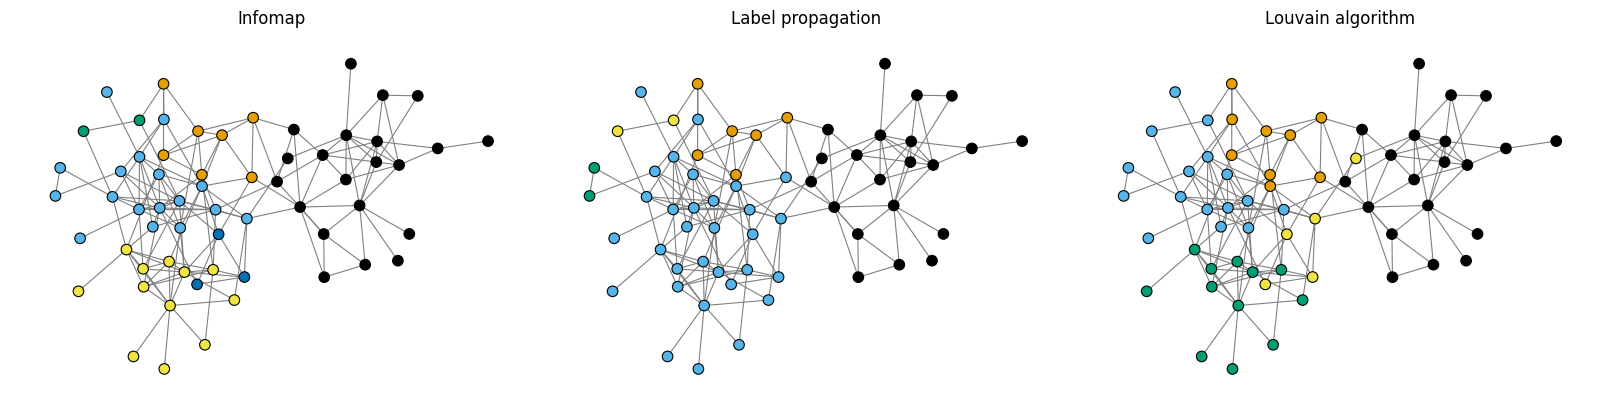

In [ ]:
fig_dolphins, axes = plt.subplots(1, 3, figsize=(16, 4), layout='constrained')
partitions = [part_dolphins_infomap, part_dolphins_labelprop, part_dolphins_louvain]
names = ['Infomap', 'Label propagation', 'Louvain algorithm']
for ax, partition, name in zip(axes, partitions, names):
    membership = partition_to_membership(partition)
    visualize(dolphins_net, membership, dolphins_coords, ax=ax)
    ax.set_title(name)


In [ ]:
part_polblogs_infomap, part_polblogs_labelprop, part_polblogs_louvain = compare_community_detection_methods(polblogs_net, rng, num_trials=20)

INFOMAP ALGORITHM
Infomap found 37 modules with codelength: 8.68
Number of communities found: 37
Modularity of the partition: 0.4246
-----------------------------------------------------

SEMI-SYNCHRONOUS LABEL PROPAGATION
Number of communities found: 8
Modularity of the partition: 0.0013
-----------------------------------------------------

LOUVAIN ALGORITHM
Number of communities found: 12
Modularity of the partition: 0.4272


## **c) Community detection in ER networks**
Finally, **generate** an Erdos-Renyi network with $N = 500$ nodes and average degree $\langle k \rangle= 10$, and **apply** the three community detection methods to it.

**Hint**: If the generated network is not connected, regenerate another one until you get a connected network.

In [ ]:
n_nodes = 500
avg_degree = 10
p = avg_degree/(n_nodes - 1)  # Probability of edge creation

# Create the Erdos-Renyi random graph
G = nx.erdos_renyi_graph(n_nodes, p)
# Generate a connected Erdos-Renyi network
connected = False
while not connected:
    # Create an Erdos-Renyi graph
    erg = nx.erdos_renyi_graph(n_nodes, p)

    # Check if the graph is connected
    connected = nx.is_connected(erg)

part_erg_infomap, part_erg_labelprop, part_erg_louvain = compare_community_detection_methods(erg, rng, num_trials=20)


INFOMAP ALGORITHM
Infomap found 1 modules with codelength: 8.897
Number of communities found: 1
Modularity of the partition: 0.0000
-----------------------------------------------------

SEMI-SYNCHRONOUS LABEL PROPAGATION
Number of communities found: 1
Modularity of the partition: 0.0000
-----------------------------------------------------

LOUVAIN ALGORITHM
Number of communities found: 10
Modularity of the partition: 0.2960



1. **Louvain Algorithm**:

   - **Overview**: The Louvain Algorithm, also known as the Louvain method or Louvain Modularity, is a popular and efficient community detection algorithm designed to find communities in large networks.

   - **How It Works**: The algorithm is a two-step iterative process:

     1. **Modularity Optimization**: In the first step, the algorithm optimizes the modularity of the network by iteratively merging nodes into communities to maximize the difference between the observed number of edges within communities and the expected number in a random network. This step continues until no further improvement in modularity can be achieved.

     2. **Agglomeration**: In the second step, the communities found in the first step are treated as nodes, and a new network is constructed where edges represent the aggregate connections between communities. The modularity optimization process is repeated on this aggregated network.

   - **Advantages**: Louvain Algorithm is known for its speed and ability to handle large-scale networks efficiently. It can uncover hierarchical community structures.

   - **Limitations**: While it often produces good results, Louvain can be sensitive to the initial node grouping and may sometimes find suboptimal solutions. Additionally, it doesn't perform well in cases where communities have significantly different sizes.

2. **Infomap**:

   - **Overview**: Infomap is a community detection algorithm based on the idea of information theory. It seeks to find the most efficient way to encode random walks on the network, which can reveal the underlying community structure.

   - **How It Works**: The algorithm uses a random walker to traverse the network. It looks for natural boundaries in the network where the random walker frequently changes its path. These boundaries correspond to community divisions. Infomap seeks to minimize the code length needed to represent the random walker's movements, and this code length is used to identify communities.

   - **Advantages**: Infomap is effective at detecting communities in networks with different scales, and it often reveals modular structures.

   - **Limitations**: It can be computationally intensive and may not be as fast as some other algorithms. The results can be sensitive to the choice of input parameters.

3. **Label Propagation**:

   - **Overview**: Label Propagation is a simple and efficient algorithm for community detection in networks. It's based on the idea that nodes with similar labels (or community assignments) are likely to belong to the same community.

   - **How It Works**: The algorithm starts with each node assigned a unique label or community identifier. In each iteration, nodes update their labels based on the majority label among their neighbors. This process continues until a stable state is reached where nodes no longer change their labels.

   - **Advantages**: Label Propagation is computationally efficient and works well for detecting communities in networks with a clear community structure.

   - **Limitations**: It can be sensitive to the initial assignment of labels and may not perform as well in networks with overlapping or hierarchical community structures. The algorithm might also produce trivial solutions in some cases.

These are three different approaches to community detection in networks, each with its own strengths and weaknesses. The choice of algorithm often depends on the specific characteristics of the network you are analyzing and your computational resources.